# Using keras to apply filters to images

Example of using keras to apply traditional image filters to images. Instead of trying to learn the filters/kernels here we provide some filters by hand and simply use keras to apply them to the data.

Useful to get a better feeling for what happens when you convolve an image with a kernel.

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

In [2]:
from keras.models import Model
from keras.layers import Conv2D, Input

from keras.datasets import mnist

Using Theano backend.


In [3]:
(X_train, _), (_, _) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(np.float64)

X_train /= 255

# add some noise
X_train_noisy = X_train + 0.05 * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)

11501568/11490434 [==============================] - 23s 2us/step


In [4]:
horizontal_edge = [[0, 1., 0],
                   [0, -1., 0],
                   [0, 0, 0]]
vertical_edge = [[0, 0, 0],
                 [1, -1., 0],
                 [0, 0, 0]]
gaussian_filter = [[0.077847, 0.123317, 0.077847],
                   [0.123317, 0.195346, 0.123317],
                   [0.077847, 0.123317, 0.077847]]

In [5]:
x = Input((28, 28, 1))
h = Conv2D(3, (3,3))(x)
conv = Model(x, h)

In [6]:
def set_filter(kernel1, kernel2, kernel3):
    kernels, b = conv.get_weights()
    kernels[:,:,0,0] = kernel1
    kernels[:,:,0,1] = kernel2
    kernels[:,:,0,2] = kernel3
    conv.set_weights([kernels, b])

In [7]:
set_filter(horizontal_edge, vertical_edge, gaussian_filter)

In [8]:
# use the single filter and apply it to the first few training examples
n_examples = 4
X_conv = conv.predict(X_train_noisy[:n_examples])

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


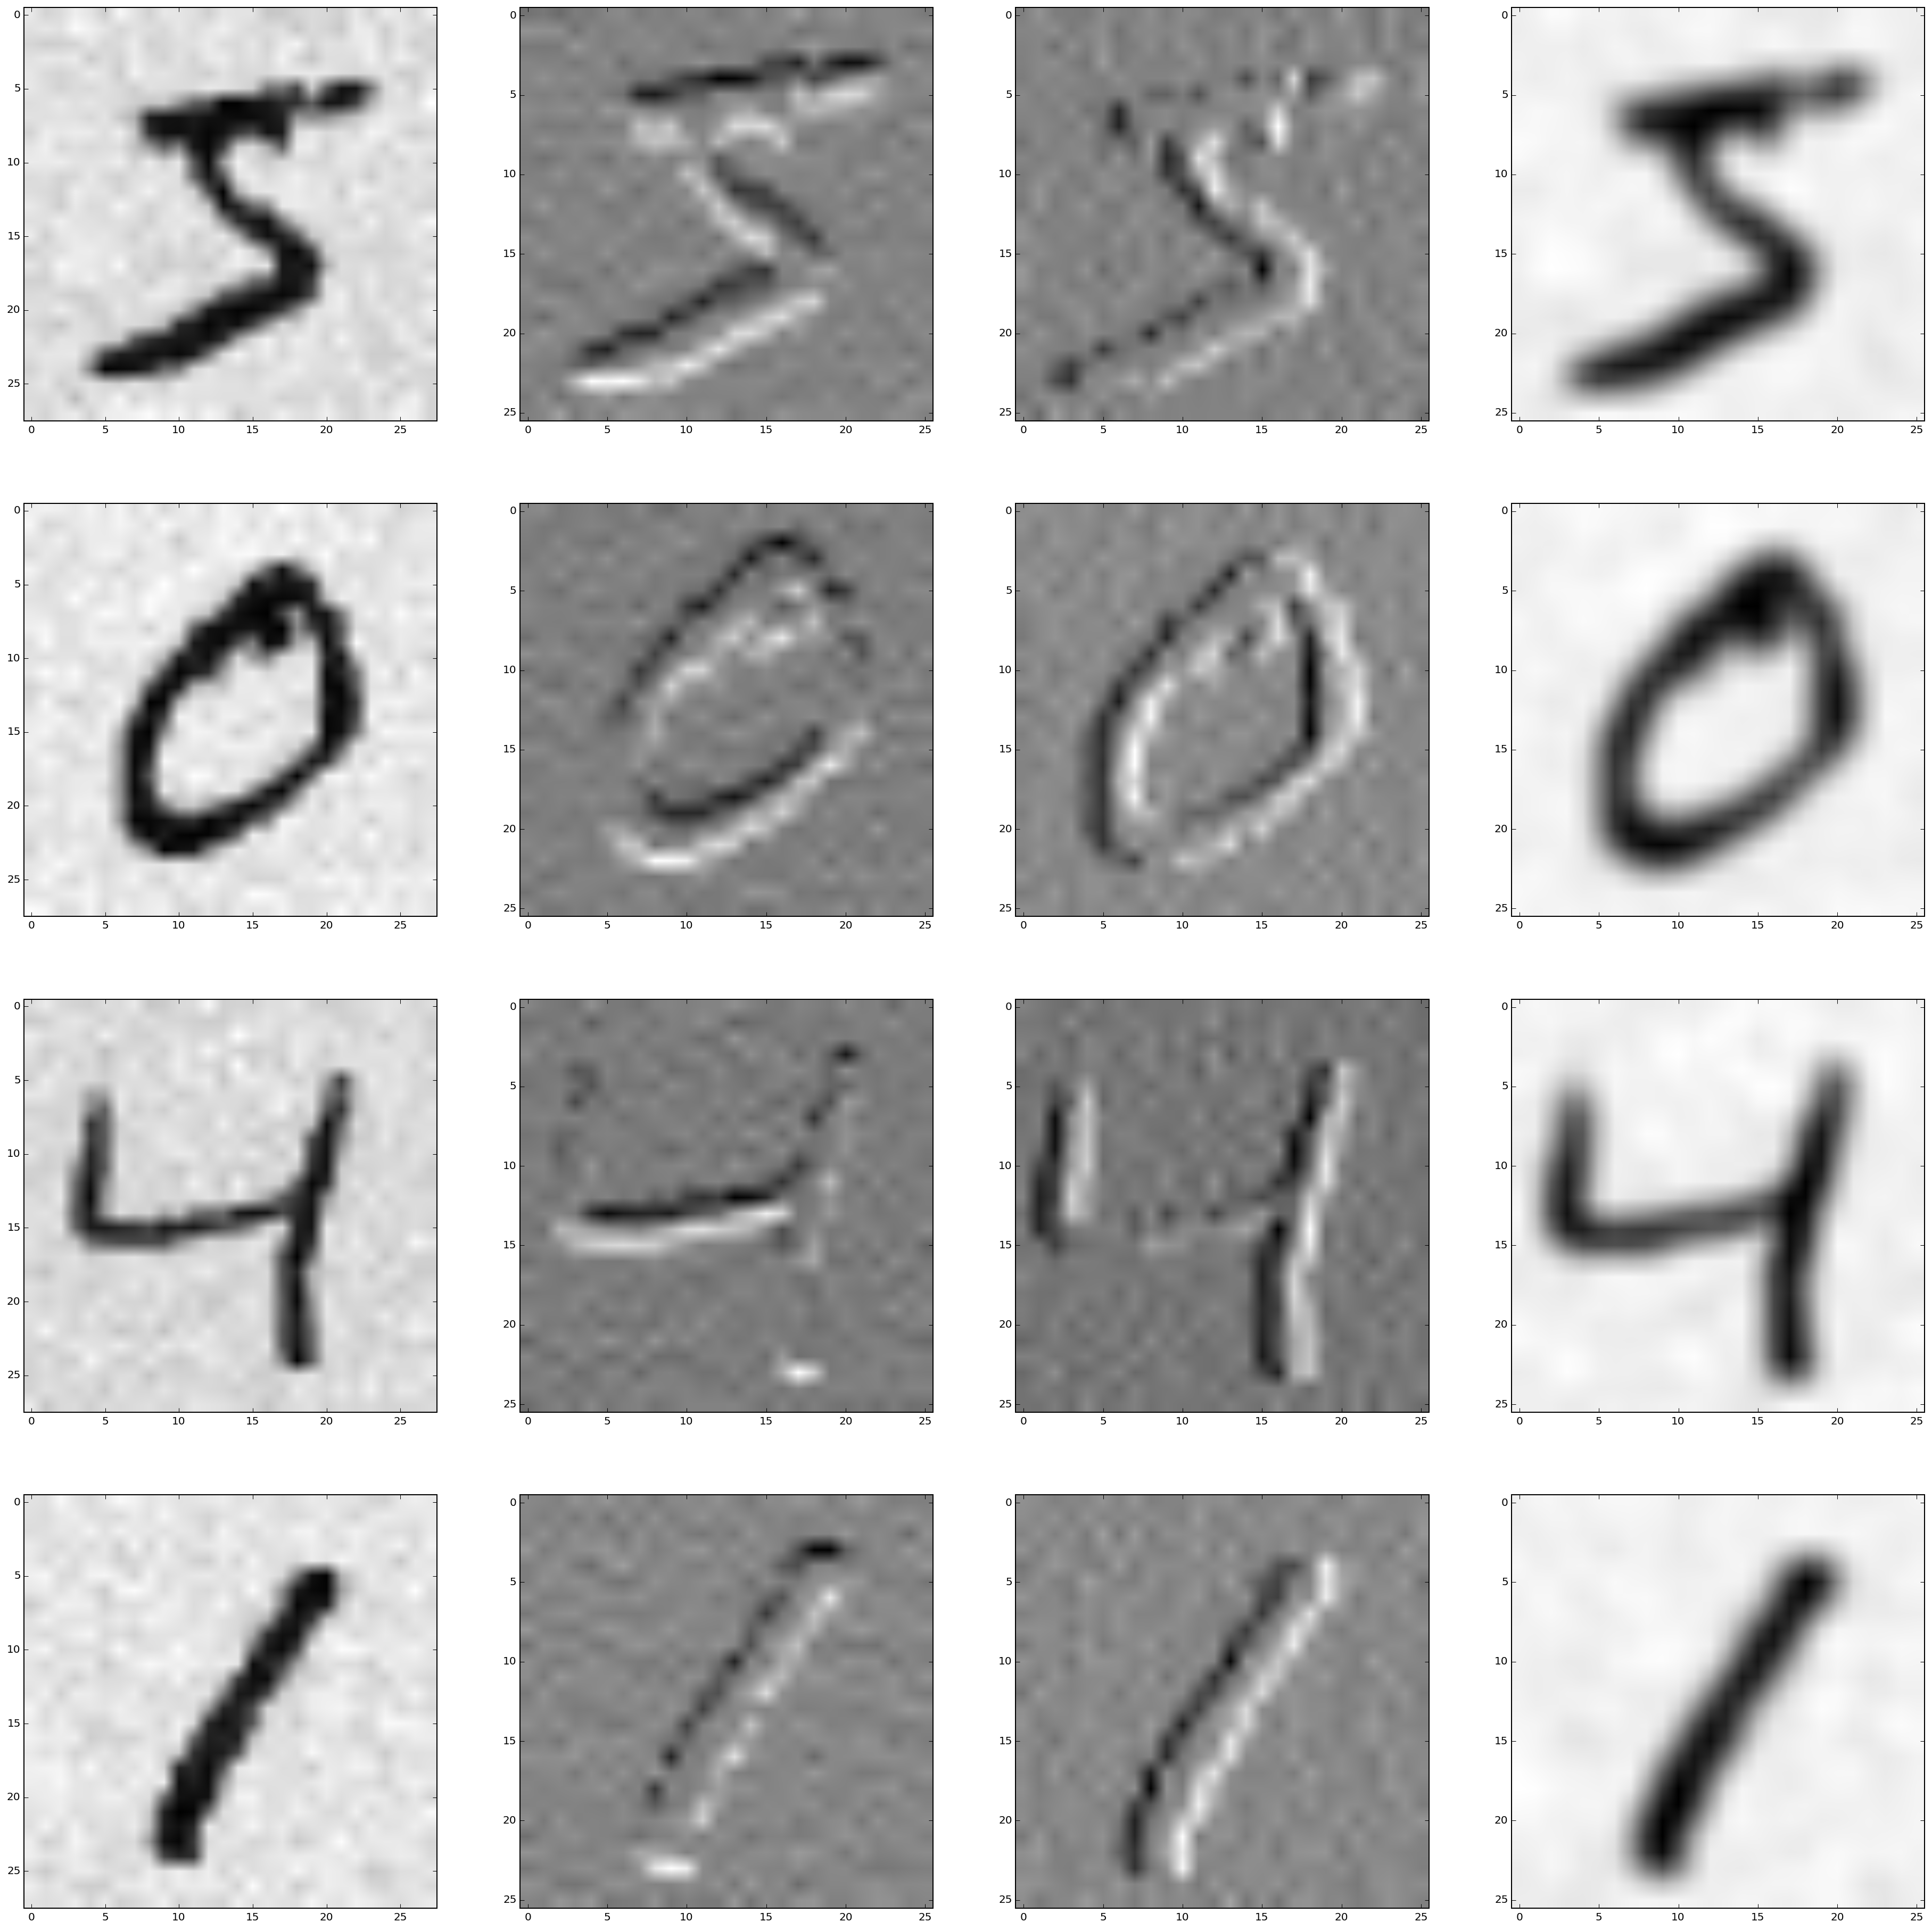

In [9]:
fig, axs = plt.subplots(n_examples, 4, figsize=(8*4, 8*n_examples))
for n, (ax1, ax2, ax3, ax4) in enumerate(axs):
    ax1.imshow(X_train_noisy[n,:,:,0], cmap=plt.cm.binary)
    ax2.imshow(X_conv[n,:,:,0], cmap=plt.cm.binary)
    ax3.imshow(X_conv[n,:,:,1], cmap=plt.cm.binary)
    ax4.imshow(X_conv[n,:,:,2], cmap=plt.cm.binary)